In [1]:
import math # importe un package
import numpy as np # importe un package sous un nom particulier from sklearn import linear_model # importe tout un module
from os import mkdir
from numpy.linalg import inv
from numpy.linalg import norm
import random
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statistics
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from scipy.stats import t
from sklearn.datasets import load_diabetes

# Central Limit Theorem

In [27]:
# Random Sample
n = 5000
m = 5000

sample = np.random.uniform(size = (m,n))
#sample

In [28]:
# Sample Means
x_bar = [np.mean(sample[i]) for i in range(len(sample))]
#x_bar

(array([   7.,   40.,  221.,  716., 1387., 1428.,  857.,  301.,   40.,
           3.]),
 array([0.4837002 , 0.48691192, 0.49012364, 0.49333537, 0.49654709,
        0.49975881, 0.50297053, 0.50618226, 0.50939398, 0.5126057 ,
        0.51581742]),
 <BarContainer object of 10 artists>)

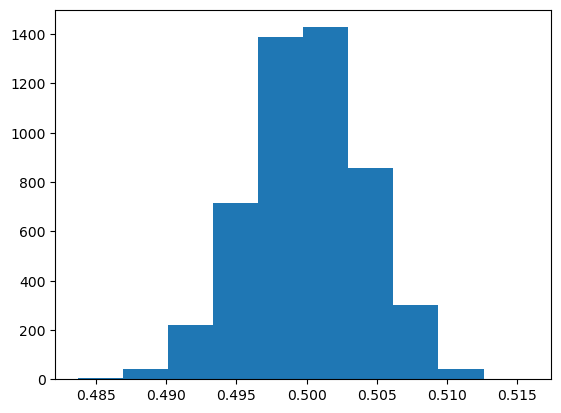

In [29]:
# Visualize the Result
plt.hist(x_bar)

## Confidence Intervals

In [31]:
S=np.array([16.621, 17.416, 19.147, 9.745, 13.082, 16.125, 15.078, 4.676, 16.923, 21.853, 12.971, 10.198, 24.208, 18.028, 11.363, 10.702, 22.305, 13.151, 20.258, 13.949])

In [51]:
S_bar = np.mean(S)
S_bar

S_std = np.std(S)
S_std

4.747624221386945

In [63]:
# Intervalle à 99%
# known std

n = len(S)
Q_99 = norm.ppf(0.995, loc=0, scale=1)

# Intervalle de confiance = (moyenne - quantile * (écart type / racine carrée de la taille de l'échantillon), moyenne + Z * (écart type / racine carrée de la taille de l'échantillon))

CI_1 = (S_bar-Q_99*(S_std/np.sqrt(n)), S_bar+Q_99*(S_std/np.sqrt(n)))
CI_1


(12.65544690914122, 18.12445309085878)

In [64]:
# Intervalle à 95%
# unknown std

n = len(S)
mean = S_bar

lower = t.ppf(0.025, n - 1, loc = mean)
upper = t.ppf(0.975, n - 1, loc = mean)

CI_2 = (S_bar-lower*(S_std/np.sqrt(n)), S_bar+upper*(S_std/np.sqrt(n)))
CI_2

(1.2739194668258875, 33.949893596928504)

# Linear Models

## Confidence intervals for the coefficients

In [84]:
# Load the diabetes dataset
diabetes = load_diabetes()

data = diabetes.data  # Les données
target = diabetes.target

df = pd.DataFrame(data, columns=diabetes.feature_names)
df['target'] = target

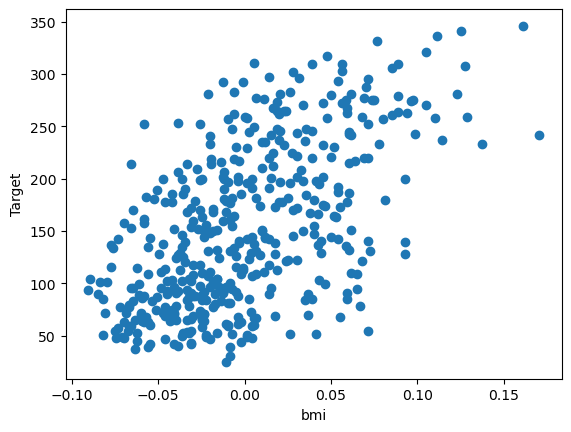

In [95]:
plt.xlabel('bmi')
plt.ylabel('Target')
plt.scatter(df['bmi'], target)

<function matplotlib.pyplot.show(close=None, block=None)>

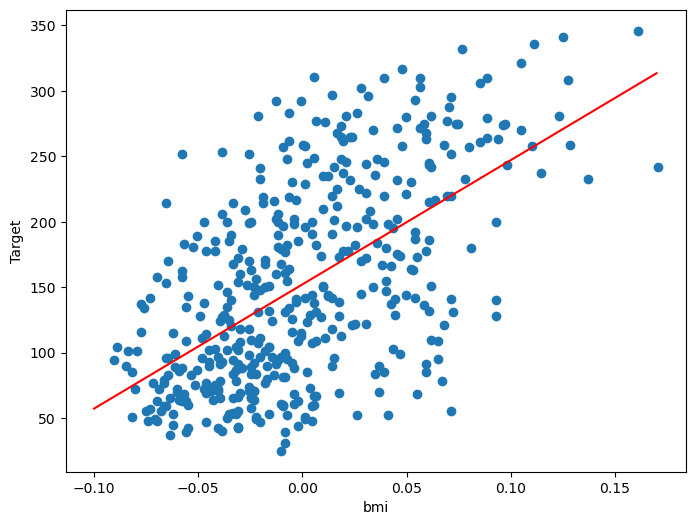

In [105]:
# Estimation of Coefficients

x = df['bmi']
y = target
plt.figure(figsize=(8, 6))
plt.xlabel('bmi')
plt.ylabel('Target')

parametres = np.polyfit(x, y, deg=1)
x_range = np.linspace(-0.1, 0.17, 100)

plt.plot(x_range,np.poly1d(parametres)(x_range), color ='red')
plt.scatter(df['bmi'], target)
plt.show

In [109]:
# Confidence Intervals for the slope

theta_1 = parametres[0]
theta_0 = parametres[1]

theta_0, theta_1

(949.4352603840236, 152.1334841628962)

In [110]:
n = len(x)
x_std = np.std(x)

CI_theta_1 = (theta_1 + t.ppf()*np.sqrt(np.std()*(1/n + ((x_bar**2)/(n*np.std()))))